In [1]:
import cv2 #pip install opencv-python

In [2]:
import matplotlib.pyplot as plt #pip install matplotlib

In [3]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [4]:
model = cv2.dnn_DetectionModel(frozen_model ,config_file)



In [5]:
classLabels = [] ## empty list of python
file_name = "Labels.txt"
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


<dnn_Model 000001DDB91B6B50>

# read an image

In [8]:
img = cv2.imread("img1.jpg")

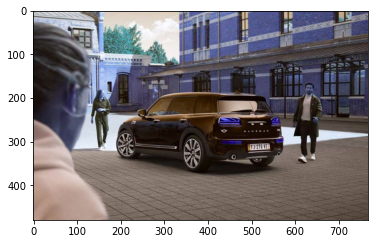

In [9]:
plt.imshow(img) ## bgr as default

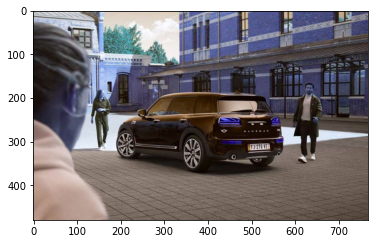

In [10]:
plt.imshow(img)

In [11]:
ClassIndex, confidence , bbox = model.detect(img,confThreshold=0.5)


In [12]:
print(ClassIndex)

[[3]
 [1]
 [1]
 [1]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd , conf , boxes in zip(ClassIndex.flatten(), confidence.flatten() , bbox ):
    cv2.rectangle(img, boxes,(255, 0 , 0), 2 )
    cv2.putText(img ,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font ,fontScale = font_scale,color=(0,255,0), thickness=3)

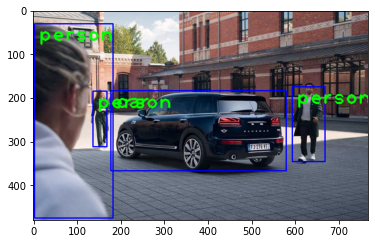

In [14]:
plt.imshow(cv2.cvtColor(img ,cv2.COLOR_BGR2RGB))

# video Demo

In [15]:
#cap = cv2.VideoCapture(1) webcam
cap = cv2.VideoCapture("Traffic1.mp4")
#check if the video is opened correctly
if not cap.isOpened():
    raise IOError("cannot open video")


    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex , confidence , bbox = model.detect(frame,confThreshold=0.56)
    print(ClassIndex)
    if ( len(ClassIndex)!=0):
        for ClassInd , conf , boxes in zip(ClassIndex.flatten(), confidence.flatten() , bbox ):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255, 0 , 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font ,fontScale = font_scale,color=(0,255,0), thickness=3)
        
    cv2.imshow('Object Detection Tutorial ', frame) 
    
    if cv2.waitKey(2) & 0xFF ==ord ('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


[[6]
 [6]
 [6]
 [3]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [3]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [1]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [6]
 [3]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [1]
 [1]
 [3]
 [8]]
[[6]
 [6]
 [6]
 [1]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [1]
 [6]
 [8]]
[[6]
 [6]
 [6]
 [1]
 [6]
 [8]]
[[6]
 [6]
 [6]
 [1]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [6]
 [3]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [6]
 

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
